In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo


heart_disease = fetch_ucirepo(id=45)


X = heart_disease.data.features
y = heart_disease.data.targets


print(heart_disease.metadata)


print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [ ]:
import pandas as pd

In [ ]:
df = pd.concat([X, y], axis=1)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df_cleaned = df.dropna()

In [ ]:
df_cleaned.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df=df_cleaned

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: Index([], dtype='object')
Numerical columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877,-0.767668
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220,0.855089
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577,0.043711
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220,-0.767668
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220,-0.767668


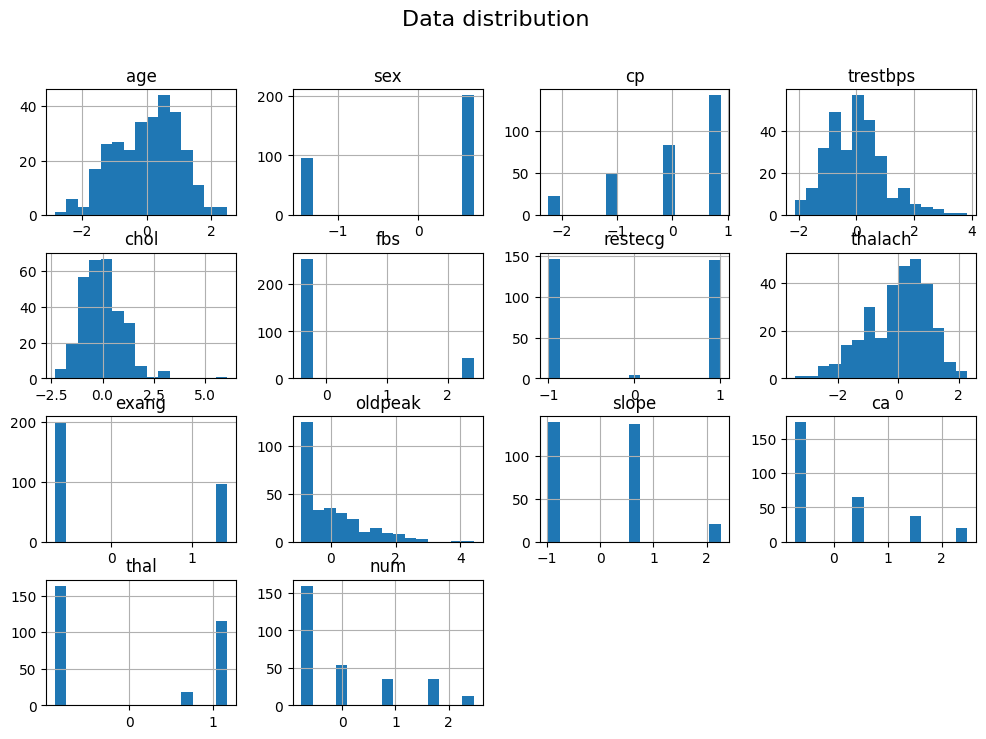

In [ ]:
df.hist(figsize=(12, 8), bins=15)
plt.suptitle('Data distribution', fontsize=16)
plt.show()

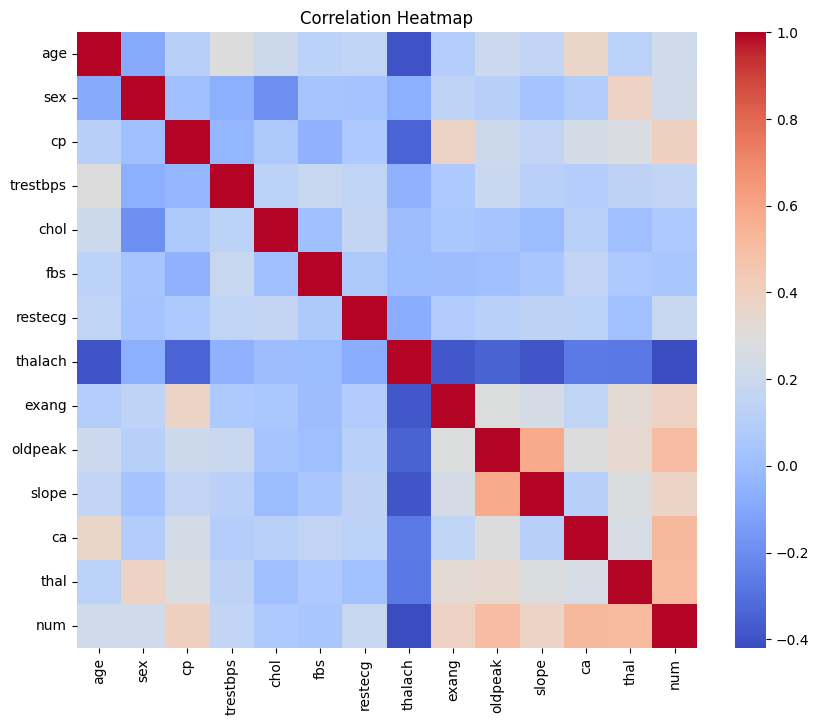

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

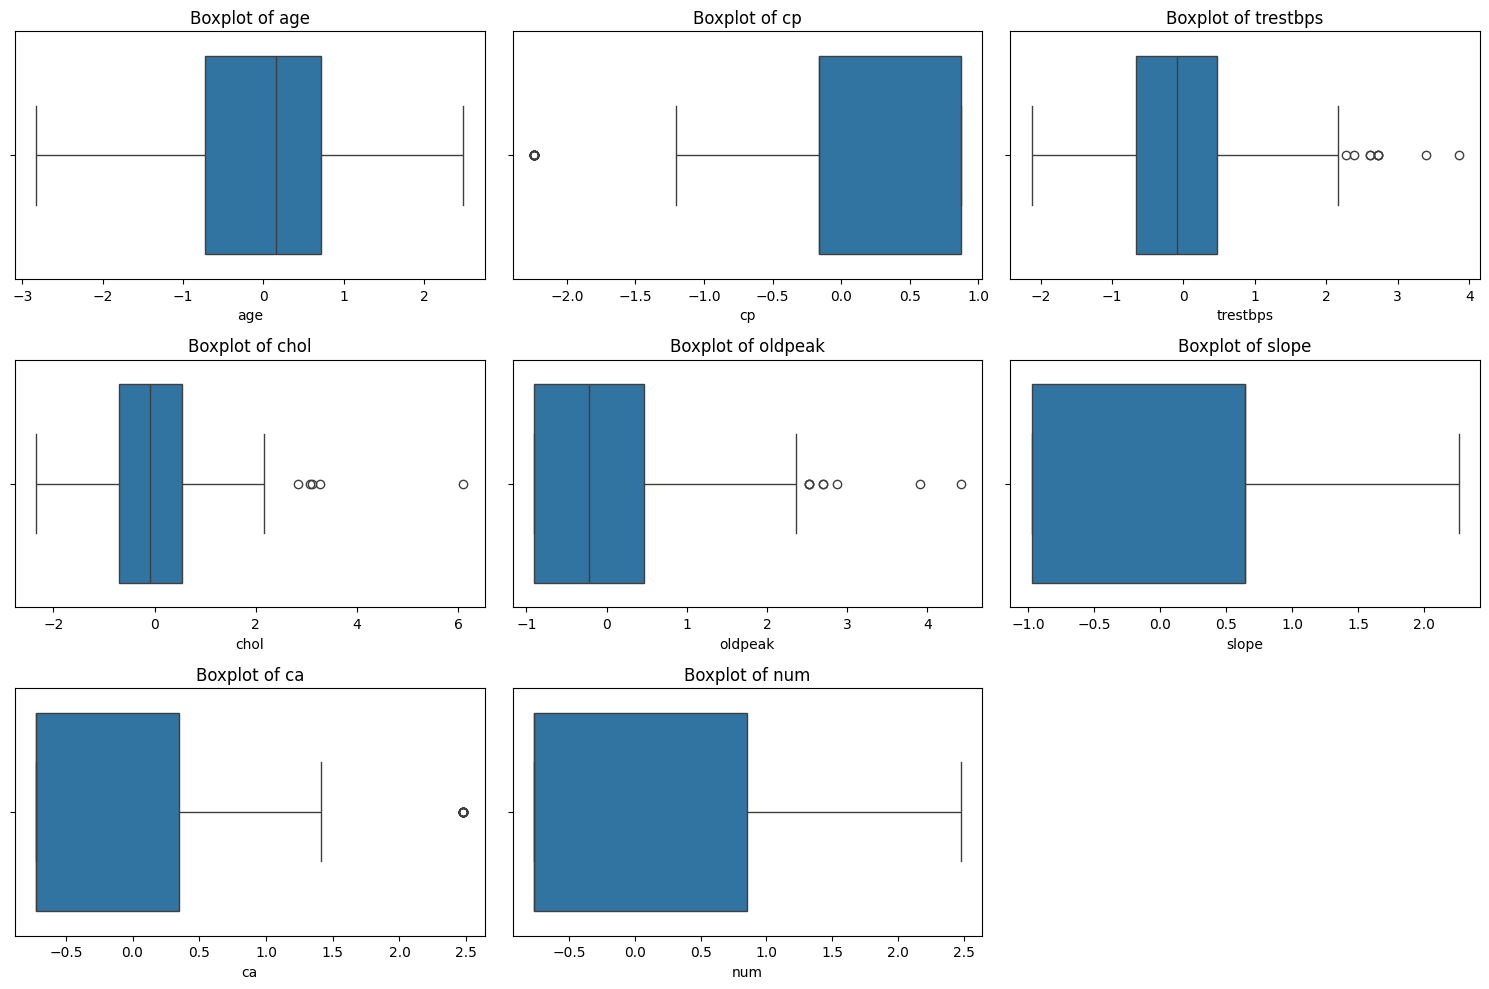

In [ ]:
selected_cols = ['age', 'cp', 'trestbps', 'chol','oldpeak','slope','ca','num']
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877,-0.767668
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220,0.855089
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577,0.043711
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220,-0.767668
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220,-0.767668


In [ ]:
df.to_csv("cleaned_data.csv", index=False)